In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
from collections import Counter

In [2]:
def startsWithDateAndTime(s):
    # regex pattern for date.(Works only for android. IOS Whatsapp export format is different. Will update the code soon
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9][0-9]), ([0-9]+):([0-9][0-9]) (AM|PM) -'
    
    
    result = re.match(pattern, s)
    if result:
        return True
    return False
  
# Finds username of any given format.
def FindAuthor(s):
    patterns = [
        '([\w]+):',                        # First Name
        '([\w]+[\s]+[\w]+):',              # First Name + Last Name
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Middle Name + Last Name
        '([+]\d{2} \d{5} \d{5}):',         # Mobile Number (India)
        '([+]\d{2} \d{3} \d{3} \d{4}):',   # Mobile Number (US)
        '([\w]+)[\u263a-\U0001f999]+:',    # Name and Emoji              
    ]
    pattern = '^' + '|'.join(patterns)
    result = re.match(pattern, s)
    if result:
        return True
    return False
  
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
# Upload your file here
conversationPath = 'WhatsApp Chat with Suvendu.txt' # chat file
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)
   
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])

In [3]:
df.head(10)

,Date,Time,Author,Message
0,2020-08-09,11:50 PM,Suvendu,Happy Birthday pratush
1,2020-08-09,11:50 PM,Suvendu,🎂🎂🎂🎂🎂
2,2020-08-09,11:53 PM,Suvendu,<Media omitted>
3,2020-08-09,11:58 PM,None,Er. Pratyush: kia kahila
4,2020-08-10,12:04 AM,None,Er. Pratyush: but grp re bhul re bi kahibuni
5,2020-08-10,12:25 AM,Suvendu,Hau
6,2020-08-10,12:27 AM,None,Er. Pratyush: hnn
7,2020-08-10,12:28 AM,Suvendu,Mote to kichhi sujogo mililani aau tote kichhi...
8,2020-08-10,12:28 AM,Suvendu,Pare kebe debi future re
9,2020-08-10,12:29 AM,None,Er. Pratyush: tu ta deluna se rbr data science


In [58]:
df['Letter_Count'] = df['Message'].apply(lambda s : len(s))
df['Word_Count'] = df['Message'].apply(lambda s : len(s.split(' ')))

def split_count(info):
    return len([c for c in info if c in emoji.UNICODE_EMOJI])

df["Emoji Count"] = df["Message"].apply(split_count)

In [59]:
df.head()

,Date,Time,Author,Message,Letter_Count,Word_Count,Emoji Count
0,2020-08-09,11:50 PM,Suvendu,Happy Birthday pratush,22,3,0
1,2020-08-09,11:50 PM,Suvendu,🎂🎂🎂🎂🎂,5,1,5
2,2020-08-09,11:53 PM,Suvendu,<Media omitted>,15,2,0
3,2020-08-09,11:58 PM,None,Er. Pratyush: kia kahila,24,4,0
4,2020-08-10,12:04 AM,None,Er. Pratyush: but grp re bhul re bi kahibuni,44,9,0


In [60]:
df['Author'] = df['Author'].fillna('Er. Pratyush')

In [61]:
df.head()

,Date,Time,Author,Message,Letter_Count,Word_Count,Emoji Count
0,2020-08-09,11:50 PM,Suvendu,Happy Birthday pratush,22,3,0
1,2020-08-09,11:50 PM,Suvendu,🎂🎂🎂🎂🎂,5,1,5
2,2020-08-09,11:53 PM,Suvendu,<Media omitted>,15,2,0
3,2020-08-09,11:58 PM,Er. Pratyush,Er. Pratyush: kia kahila,24,4,0
4,2020-08-10,12:04 AM,Er. Pratyush,Er. Pratyush: but grp re bhul re bi kahibuni,44,9,0


In [62]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)

In [63]:
media_messages_df = df[df['Message'] == 'Er. Pratyush: <Media omitted>']
messages_df = df.drop(media_messages_df.index)

## EDA

Text(0, 0.5, 'Date')

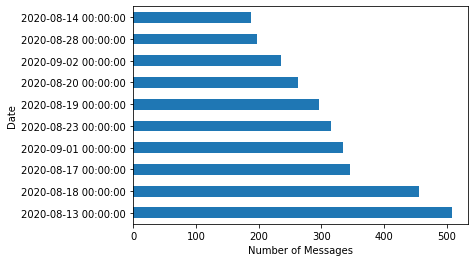

In [64]:
messages_df['Date'].value_counts().head(10).plot.barh()
plt.xlabel('Number of Messages')
plt.ylabel('Date')

Text(0, 0.5, 'Time')

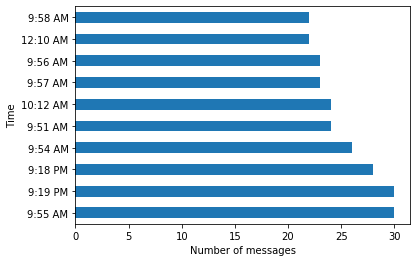

In [65]:
messages_df['Time'].value_counts().head(10).plot.barh() 
plt.xlabel('Number of messages')
plt.ylabel('Time')

In [66]:
# import plotly.express as px
# def dayofweek(i):
#   l = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
#   return l[i];
# day_df=pd.DataFrame(messages_df["Message"])
# day_df['day_of_date'] = messages_df['Date'].dt.weekday
# day_df['day_of_date'] = day_df["day_of_date"].apply(dayofweek)
# day_df["messagecount"] = 1
# day = day_df.groupby("day_of_date").sum()
# day.reset_index(inplace=True)

# fig = px.line_polar(day, r='messagecount', theta='day_of_date', line_close=True)
# fig.update_traces(fill='toself')
# fig.update_layout(
#   polar=dict(
#     radialaxis=dict(
#       visible=True,
#       range=[0,6000]
#     )),
#   showlegend=False
# )
# fig.show()

In [67]:
messages_df

,Date,Time,Author,Message,Letter_Count,Word_Count,Emoji Count
0,2020-08-09,11:50 PM,Suvendu,Happy Birthday pratush,22,3,0
1,2020-08-09,11:50 PM,Suvendu,🎂🎂🎂🎂🎂,5,1,5
2,2020-08-09,11:53 PM,Suvendu,<Media omitted>,15,2,0
3,2020-08-09,11:58 PM,Er. Pratyush,Er. Pratyush: kia kahila,24,4,0
4,2020-08-10,12:04 AM,Er. Pratyush,Er. Pratyush: but grp re bhul re bi kahibuni,44,9,0
...,...,...,...,...,...,...,...
4641,2020-09-06,12:15 PM,Suvendu,Kahibuni katha padia taana,26,4,0
4642,2020-09-06,12:16 PM,Suvendu,"Rupa sagadi re suna kani ,nua jahna pari chhan...",55,10,0
4643,2020-09-06,12:16 PM,Suvendu,Taku paiba Jia domestic violence kariba sia,43,7,0
4644,2020-09-06,12:16 PM,Suvendu,😃,1,1,1


## Q 1) Who is the most active member in chart. Who is the least active?

In [68]:
messages_df.groupby("Author")["Message"].count().sort_values(ascending=False)

Author
Suvendu         2574
Er. Pratyush    2001
Name: Message, dtype: int64

## Q 2) Count of all the emojis that i have used?

In [69]:
me = "Er. Pratyush"

In [70]:
emoji_ctr = Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in messages_df.iterrows():
    if row["Author"] == me:
        emojis_found = r.findall(row["Message"])
        for emoji_found in emojis_found:
            emoji_ctr[emoji_found] += 1

In [71]:
for item in emoji_ctr.most_common(10):
    print(item[0] + " - " + str(item[1]))

🏻 - 20
😃 - 16
🧐 - 12
👏 - 11
🤦🏻‍♂ - 6
🤨 - 6
🤭 - 6
🤔 - 6
👰 - 6
🤷🏻‍♂ - 4


In [73]:
comment_words = ' '
stopwords = STOPWORDS.update(['lo', 'ge', 'Lo', 'illa', 'yea', 'ella', 'en', 'na', 'En', 'yeah', 'alli', 'ide', 'okay', 'ok', 'will'])
  
for val in df.Message.values: 
    val = str(val) 
    tokens = val.split() 
        
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

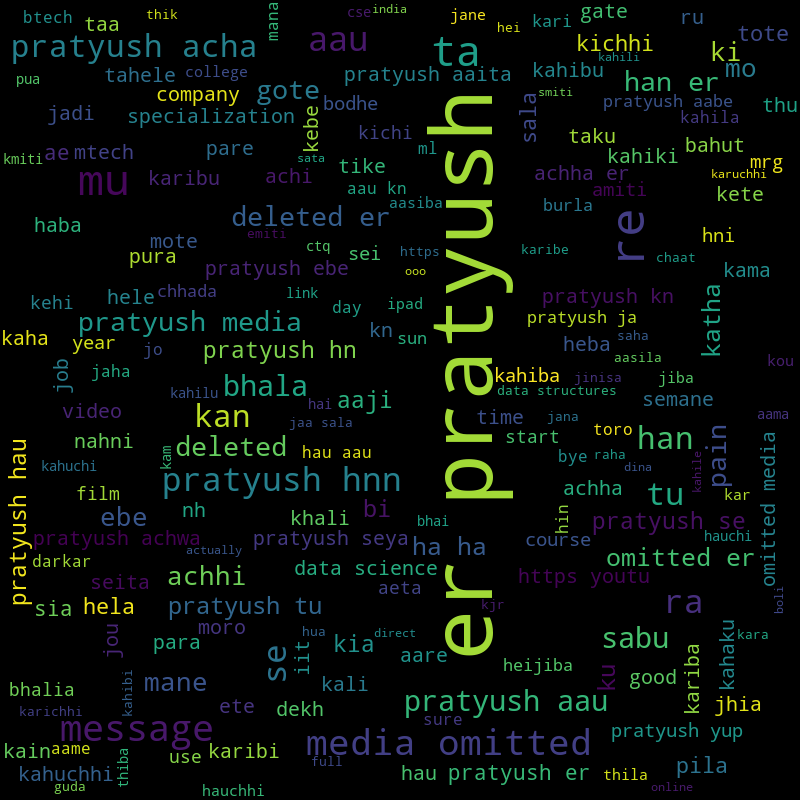

In [74]:
wordcloud.to_image()